<a href="https://colab.research.google.com/github/jefferyssnyder/PyTorch_Tutorial/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow
Let's explore an example of PyTorch end-to-end workflow.

Resources: 
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

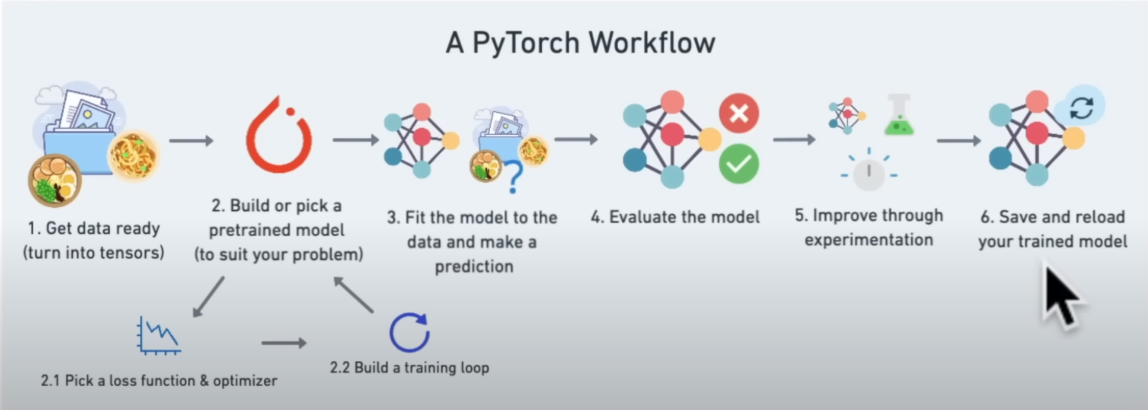

In [ ]:
what_we_covering = {1: "data (prepare and load)",
                    2: "build model",
                    3: "fitting the model to data (training)",
                    4: "making predictions and evaluating a model (inference)",
                    5: "saving and loading model",
                    6: "putting it all together"}

In [ ]:
import torch
from torch import nn # nn contains all of  PyTorch's building blocks for neural network
import numpy as np
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__


'2.0.1+cu118'

## 1. Data (preparing and loading) (Video time 4:28:00)

Data can be almost anything in ML
* Excel spreadsheet
* images of any kind
* videos
* Audio
* DNA
* text

Machine learning is a game of 2 parts:
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation


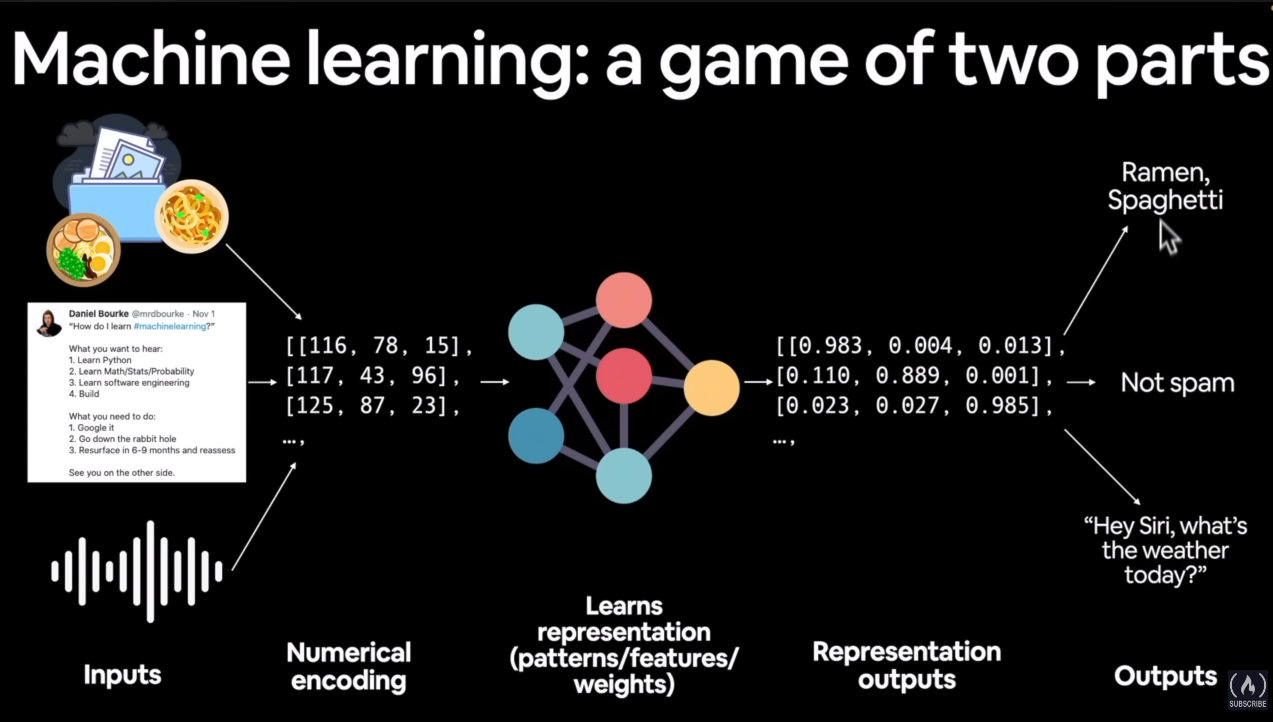

### To show case this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.


In [ ]:
# Create *known* parameters
# Linear regression formula Y = a + bX
# b = weight
# a = bias

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important consepts in ML in general)

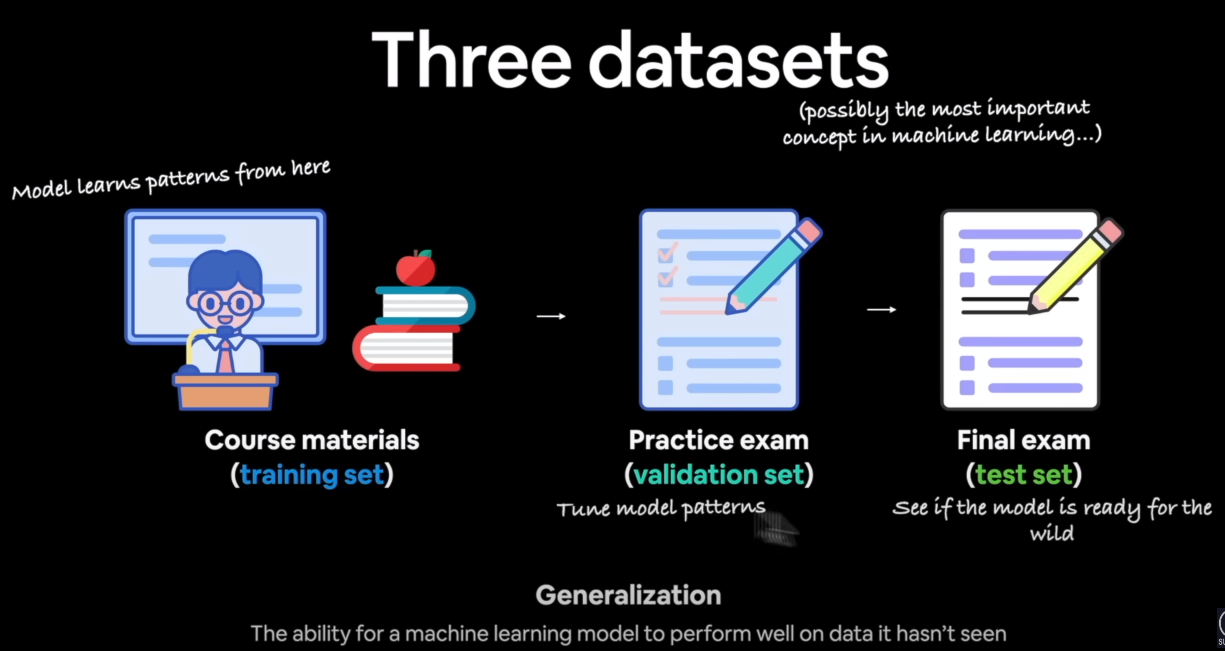



In [ ]:
# Let's create training and test datasets with our data.

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# Visualize the data, instead of data points in an output.
#  This is where the data explorer's motto is ustilized, "Visualize, Visualize, Visualize, "
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None,
                     plot_title = "No Title Given"):
  """
  Plots training data, test data, and compares predictions
  """

  plt.figure(figsize=(10,7))

# Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

# Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

# Are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Prediction Data")

# Show the legends
  plt.legend(prop={"size": 14});
  plt.title(plot_title)


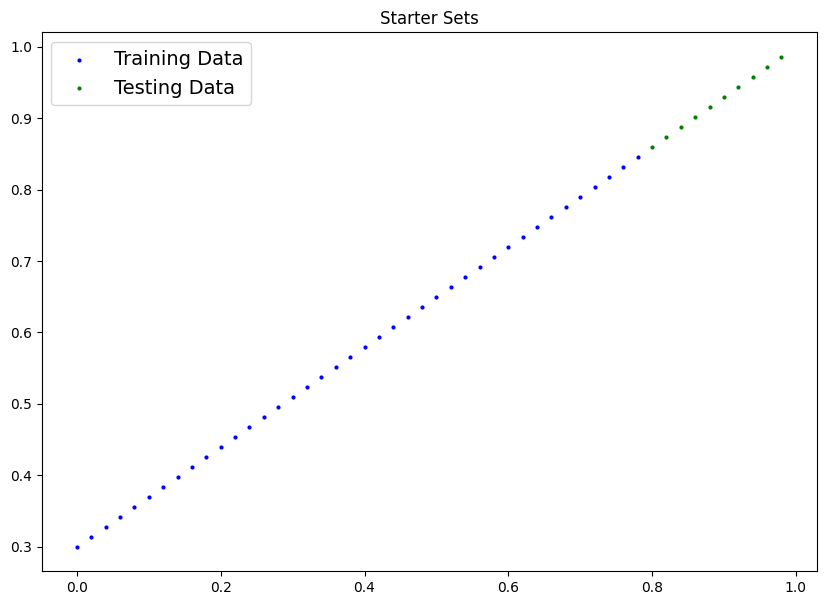

In [ ]:
plot_predictions(plot_title = "Starter Sets")

## 2. Build Model
Our first PyTorch Model!

Object Orient Programming refresher:
https://realpython.com/python3-object-oriented-programming/ 

What our model will do:
* start with random values (weight & bias)
* look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How will it do this: through 2 main algorithms
1. Gradient descent <- this means that it will require a gradient (requires_grad = True)
    * https://youtu.be/IHZwWFHWa-w
2. Back propagation
    * https://youtu.be/Ilg3gGewQ5U

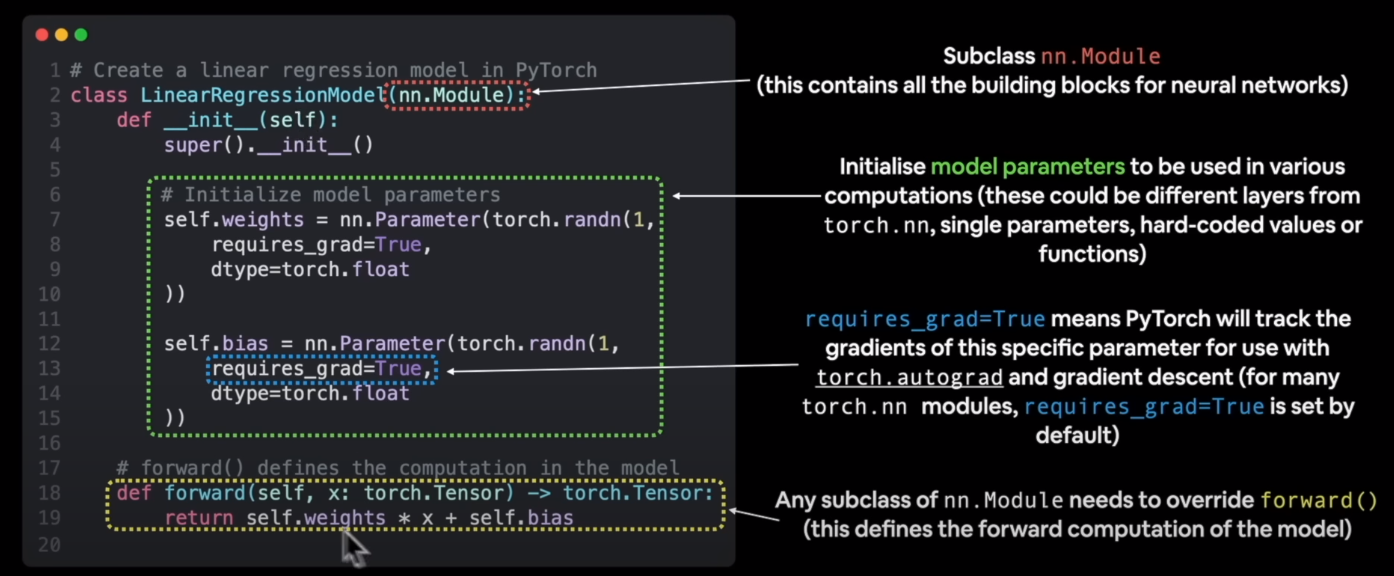

In [ ]:
# Create a linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):                                             # initialize the constructor to get started
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1,                      # <- start with a random weight and try to adjust to ideal weight
                                           requires_grad = True,  # <- can this parameter be updated via gradient descent? (not really needed since it is default True)
                                           dtype = torch.float))  # <- PyTorch loves the datatype torch.float32 (not really needed since it is default float32)
    self.bias = nn.Parameter(torch.rand(1,                        # <- start with a random weight and try to adjust to ideal weight
                                        requires_grad = True,     # <- can this parameter be updated via gradient descent? (not really needed since it is default float32)
                                        dtype = torch.float))           # <- PyTorch loves the datatype torch.float32
  # Forward method to define the computation model
  def forward(self, x: torch.Tensor) -> torch.Tensor:             # "x" is the input data
    return self.weight * x + self.bias                            # this is the linear regression formula



### PyTorch model building essentials (Video time: 5:13:43)

* torch.nn - contains all of the building blocks for computational graphs (a neural network is considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn,often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it you should override forward()
* torch.optim - where the optimizers in PyTorch live and will help with gradient descent 
* def forward() - All nn.Module subclasses requires an override forward() which defines what happens in the forward computations

Some more references as a cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

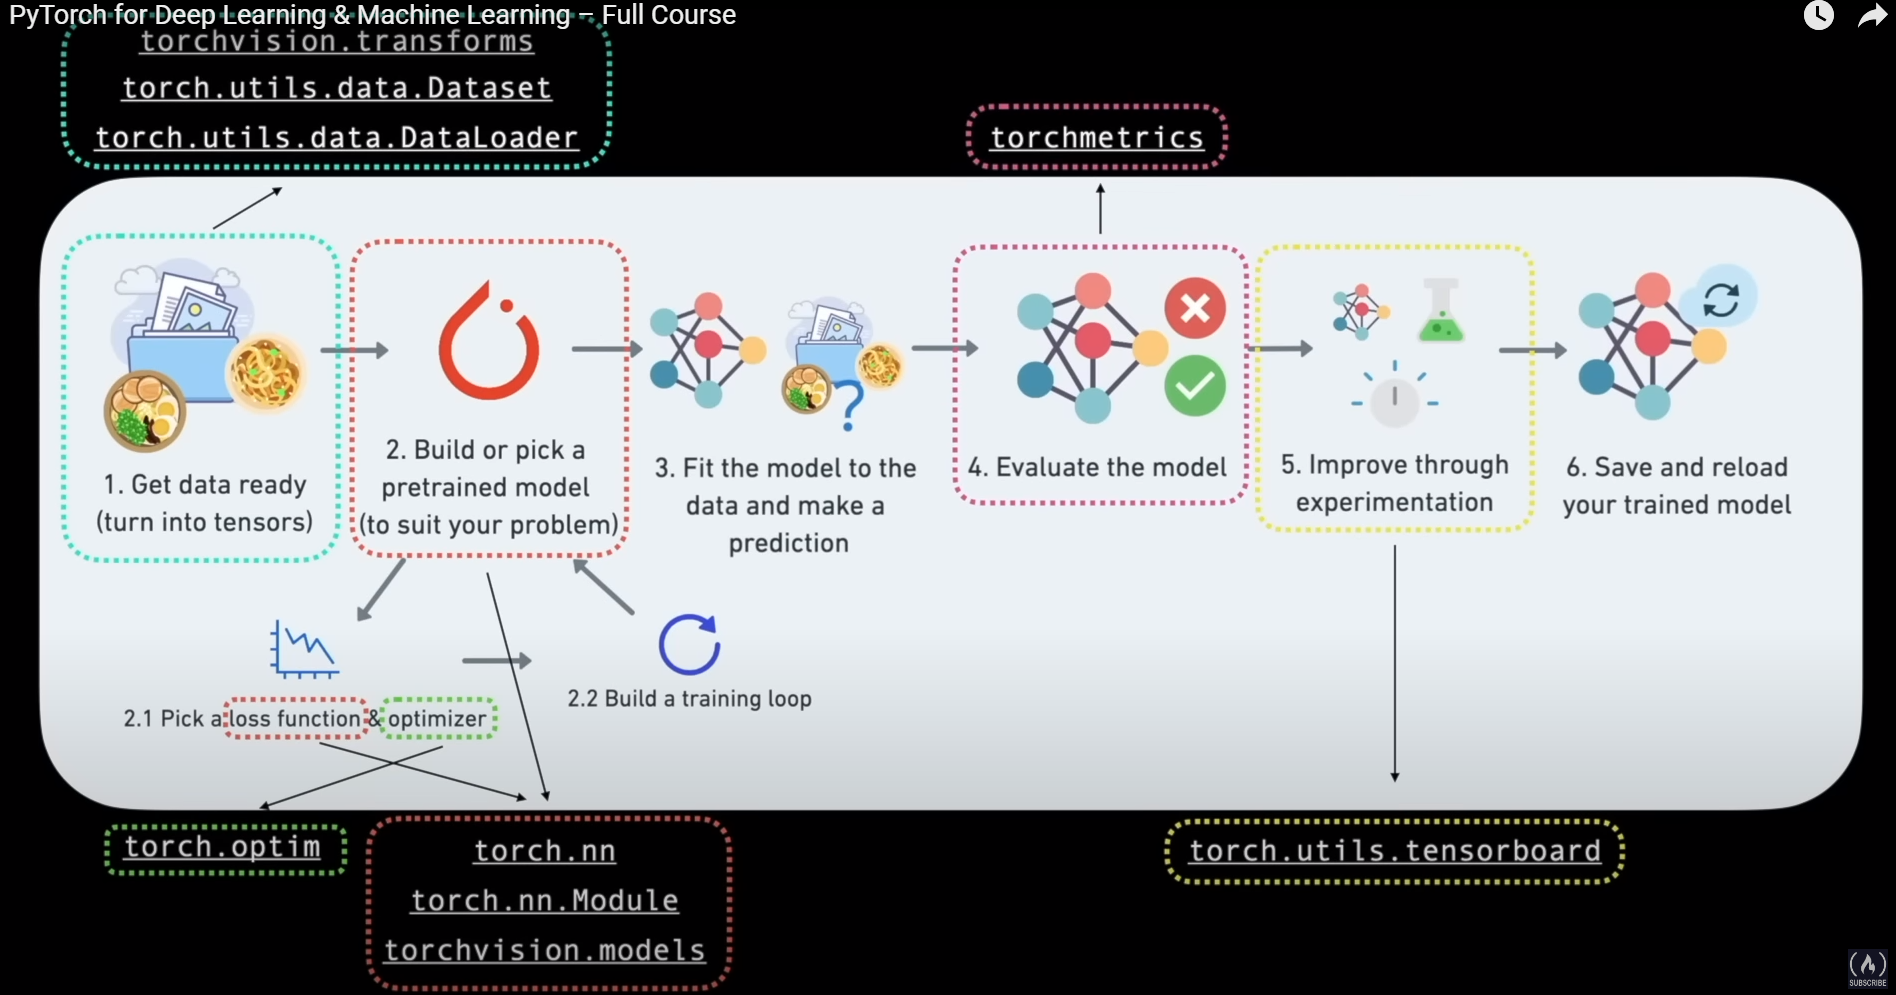

### Checking the contents of our PyTorch model

Now that we have created a model, let's see what is inside....

So we can chec the model parameters or what is inside the model by using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List the named parameters
print(f"Weight parameters of the original dataset {weight}")
print(f"Bias parameters of the original dataset {bias}")
print(f"Parameters of the generated model: {model_0.state_dict()}")


Weight parameters of the original dataset 0.7
Bias parameters of the original dataset 0.3
Parameters of the generated model: OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])


### Making predictions using 'torch.inference_mode()'

To check out model's predictive power, let's see how it predicts 'y_test' based on 'x_test'.

When we pass data through the model, it is going to run it through the forward method.

In [ ]:
### Here is how is is supposed to work....

print(f"By passing the X_test dataset into model_0: \n{X_test}")
print(f"\nIdeally it should predict the y_test dataset: \n{y_test}")

By passing the X_test dataset into model_0: 
tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

Ideally it should predict the y_test dataset: 
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [ ]:
#  Make predictions with model
with torch.inference_mode(): # <- preferred
  y_preds = model_0(X_test)

with torch.no_grad():
  y_preds2 = model_0(X_test)

print(y_preds)
print(f"\n {y_preds2}")

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

 tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


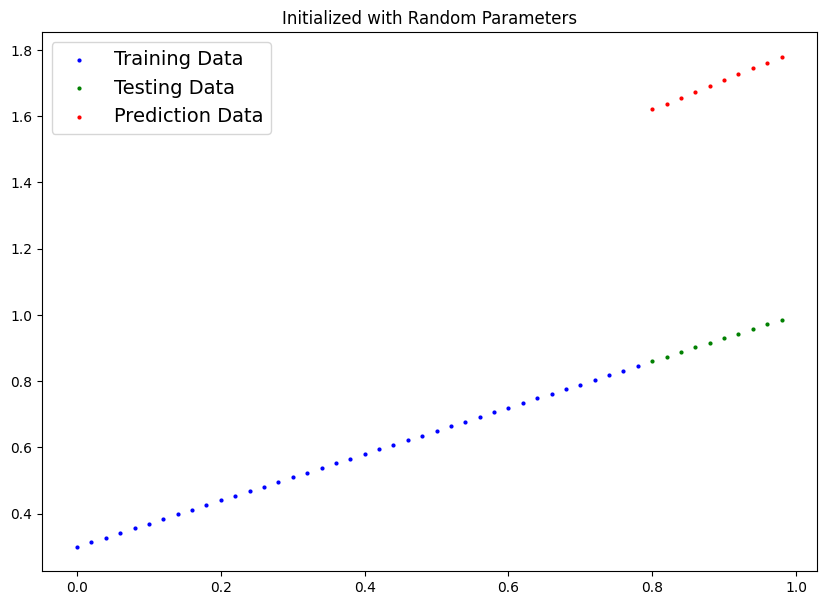

In [ ]:
plot_predictions(predictions=y_preds, plot_title = "Initialized with Random Parameters")

## 3. Train model

The whole idea of training is the model to move from *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to our better representation of the data.

One way to measure how poor  or how wrong the prediction models are is to use a loss function.

The terminology loss function = cost function = criterion.

Things we need to train:
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
  * https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case to improve the loss function)
  * https://pytorch.org/docs/stable/optim.html
    * Inside the optimizer you'll have to set 2 paramters:
      * params - the model parameters you'd like to optimize, for example params=model_0.parameters()
      *lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a smaller lr results in a smann change , a large lr results in a large change)

And specifically in PyTorch we need:
* A training loop
* A testing loop

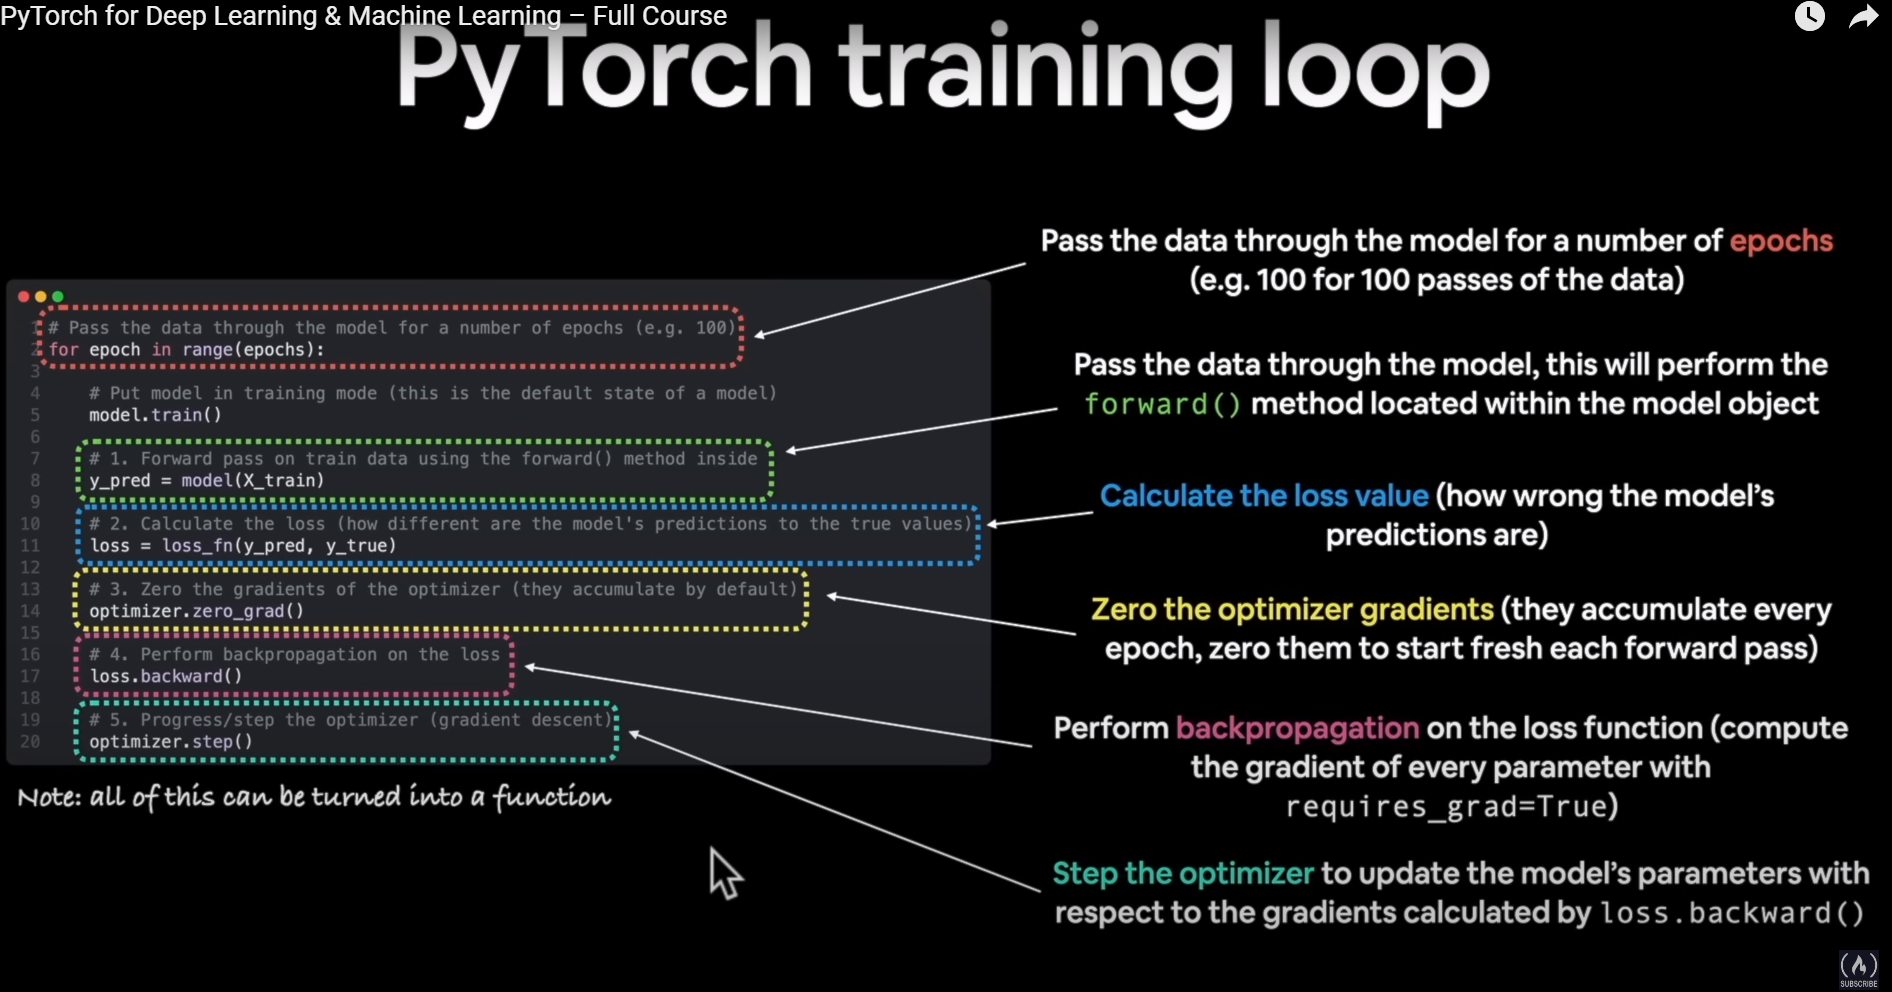

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
# Set a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer - Stochastic Gradient Decent - SGD (Video time: 5:57:00)
my_optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # <- lr = learning rate

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` suffice.

but for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to us a loss function of `nnBCELoss()` binary cross entropy loss.

### Building a training loop (and a testing loop) in PyTorch (Video time 5:41:15)

A couple of things we need in a training loop:


0.  Loop through the data
1.  Forward pass (this involves data moving through our model's `forward()` function) - also known as forward propagation
2.  Calculate the loss (compare forward pass predictions to ground truth labels)
3.  Optimizer zero grad
4.  Loss backward - move backwards the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backproagation**)
5.  Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss
 (**gradient decent**)



In [ ]:
# An epoch is one loop through the data... (this is a hyper parameter bc we have set it ourselves)
torch.manual_seed(42)
epochs = 100

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

print(f"Weight parameters of the original dataset {weight}")
print(f"Bias parameters of the original dataset {bias}")

### Training
# 0. Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # train mode in PyTorch set all paramteres that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  my_optimizer.zero_grad()

  # 4. Perform backpropogation on the loss with respect to the parameters of model
  loss.backward()

  # 5. Step the Optimizer (perform gradient descent
  my_optimizer.step() # by default how the optimizer changes will accumulate so we will need to zero them in step 3

  ### Testing
  model_0.eval() # turns off different setting sin the midel not needed for evaluation/testing (dropout/batchNorm layers)
  with torch.inference_mode(): # turns off gradient tracking and a couple othere functions not needed while testing
    # 1. Do the forward pass in testing mode
    test_pred = model_0(X_test)

    # 2. Calulate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


print(f"weight: {model_0.state_dict()['weight']} Bias: {model_0.state_dict()['bias']} Loss: {loss}")


Weight parameters of the original dataset 0.7
Bias parameters of the original dataset 0.3
Epoch: 0 | Loss: 0.6860889196395874 | Test loss: 0.7637526988983154
Epoch: 10 | Loss: 0.5708791017532349 | Test loss: 0.6290428042411804
Epoch: 20 | Loss: 0.45566922426223755 | Test loss: 0.4943329691886902
Epoch: 30 | Loss: 0.34045934677124023 | Test loss: 0.35962313413619995
Epoch: 40 | Loss: 0.2252494841814041 | Test loss: 0.2249133139848709
Epoch: 50 | Loss: 0.1100396141409874 | Test loss: 0.09020347893238068
Epoch: 60 | Loss: 0.009724985808134079 | Test loss: 0.020998019725084305
Epoch: 70 | Loss: 0.006216754671186209 | Test loss: 0.014099234715104103
Epoch: 80 | Loss: 0.002788322512060404 | Test loss: 0.005826681852340698
Epoch: 90 | Loss: 0.007095950655639172 | Test loss: 0.00754010071977973
weight: tensor([0.6977]) Bias: tensor([0.3080]) Loss: 0.004425036255270243


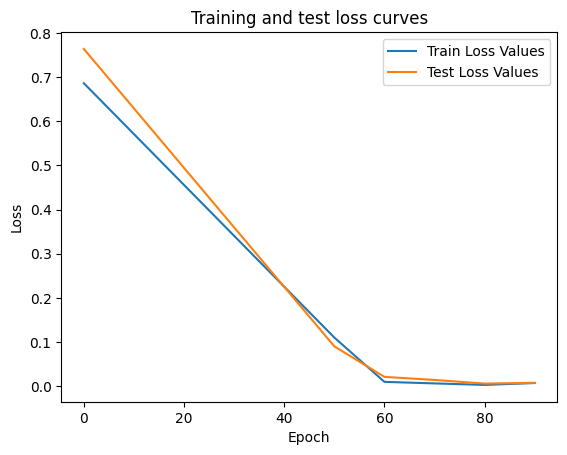

In [ ]:
# Plot loss curves
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train Loss Values")
plt.plot(epoch_count, test_loss_values, label="Test Loss Values")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

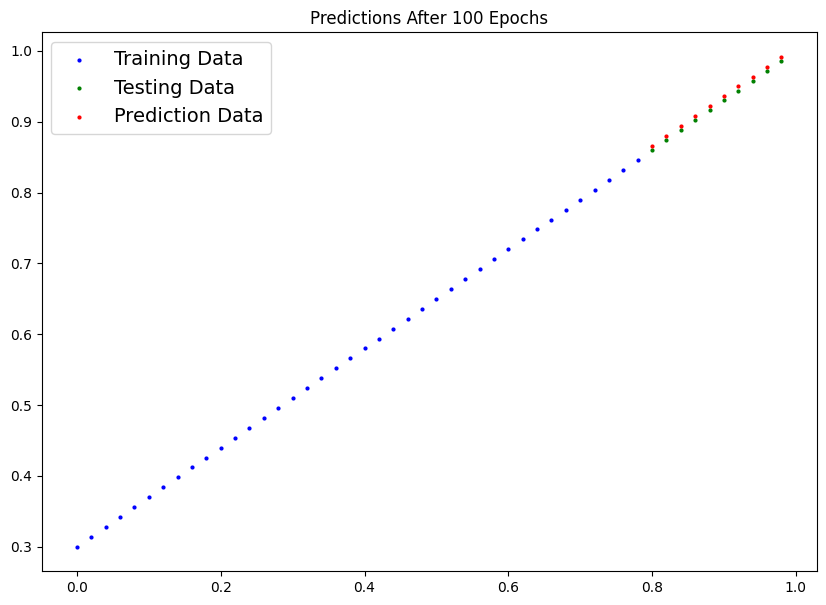

In [ ]:
plot_predictions(predictions=y_preds_new, plot_title = f"Predictions After {epochs} Epochs")

## Saving models in PyTorch (Video time 7:17:53)
There are three main methods you should know about for saving and loading in PyTorch.


1.   `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2.   `torch.load()` - allows you to load a saved PyTorch object
3.   `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

https://pytorch.org/tutorials/beginner/saving_loading_models.html



In [ ]:
# Saving our PyTorch model
from pathlib import Path

# Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # <- We can use this syntax to create the file in the directory bc we are using pathlib

# 3. Save model state_dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# !ls -l models
model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model we will create a new instance of our model class and load the saved `state_dict()` into that

In [ ]:
# 1. To load in a saved state_dict we need to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
# checking what the loaded_model_0.state_dict looks like before loading in the parameters
# loaded_model_0.state_dict()

# 2.  Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()


OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# Make some predictions with our loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds, y_preds

(tensor([[0.8661],
         [0.8801],
         [0.8940],
         [0.9080],
         [0.9220],
         [0.9359],
         [0.9499],
         [0.9638],
         [0.9778],
         [0.9917]]),
 tensor([[1.6208],
         [1.6385],
         [1.6561],
         [1.6738],
         [1.6914],
         [1.7090],
         [1.7267],
         [1.7443],
         [1.7620],
         [1.7796]]))

In [ ]:
# Make some model_0 preds

model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

loaded_model_preds, y_preds, y_preds == loaded_model_preds # <- Compare loaded model preds with original model preds..these should all be true

(tensor([[0.8661],
         [0.8801],
         [0.8940],
         [0.9080],
         [0.9220],
         [0.9359],
         [0.9499],
         [0.9638],
         [0.9778],
         [0.9917]]),
 tensor([[0.8661],
         [0.8801],
         [0.8940],
         [0.9080],
         [0.9220],
         [0.9359],
         [0.9499],
         [0.9638],
         [0.9778],
         [0.9917]]),
 tensor([[True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True]]))

# 6.0 Putting it all together (Rinse & Repeat)

Let's go back trough the steps above and see it all in one place

In [ ]:
# Import PyTorch and matplotlig
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

#Check PyTorch version
torch.__version__



'2.0.1+cu118'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentiallyfaster computing)

If no GPU is availbel the code will default to CPU

In [ ]:
# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [ ]:
# Create some data using the linear regression fromula y = mx + bias
weight = 0.7
bias = 0.3

# Create range of values
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze errors will pop up later
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# split the data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

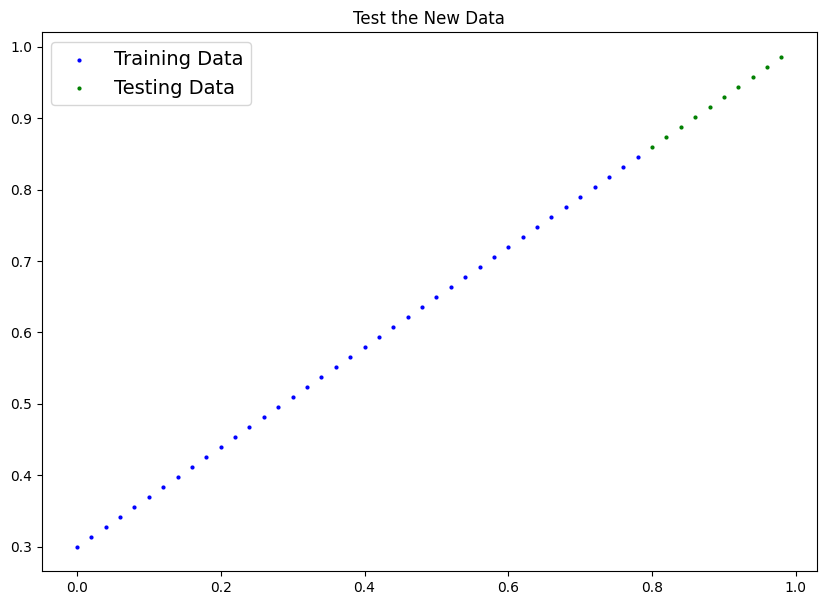

In [ ]:
# plot the data

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None,
                     plot_title = "No Title Given"):
  """
  Plots training data, test data, and compares predictions
  """

  plt.figure(figsize=(10,7))

# Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

# Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

# Are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Prediction Data")

# Show the legends
  plt.legend(prop={"size": 14});
  plt.title(plot_title)

plot_predictions(X_train, y_train, X_test, y_test, plot_title="Test the New Data")

### 6.2 Building a PyTorch Linear Model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters / also called Linear transform, probing layer, fully connect layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1) # <- these are set to one bc of the data in the tensor

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed for reproducability
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

# visualize what we just built
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### 6.3 Train the Model

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# check the model's current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Set up a loss function
loss_function = nn.L1Loss() # Same as MAE

# Setup Optimizer
my_optimizer_1 = torch.optim.SGD(params = model_1.parameters(), lr=0.01)

In [ ]:
# Create the training loop
torch.manual_seed(42)
epochs = 200

# Since we put the model in device-agnostic code, we will need to add the data to the same device by making it device-agnostic as well
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_function(y_pred, y_train)

  # 3. Optimizer zero grad
  my_optimizer_1.zero_grad()

  # 4. Perform backpropogation
  loss.backward()

  # 5. Optimize step
  my_optimizer_1.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_function(test_pred, y_test)

  # Print out what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
# Check the model
weight, bias, model_1.state_dict()

(0.7,
 0.3,
 OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]))

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

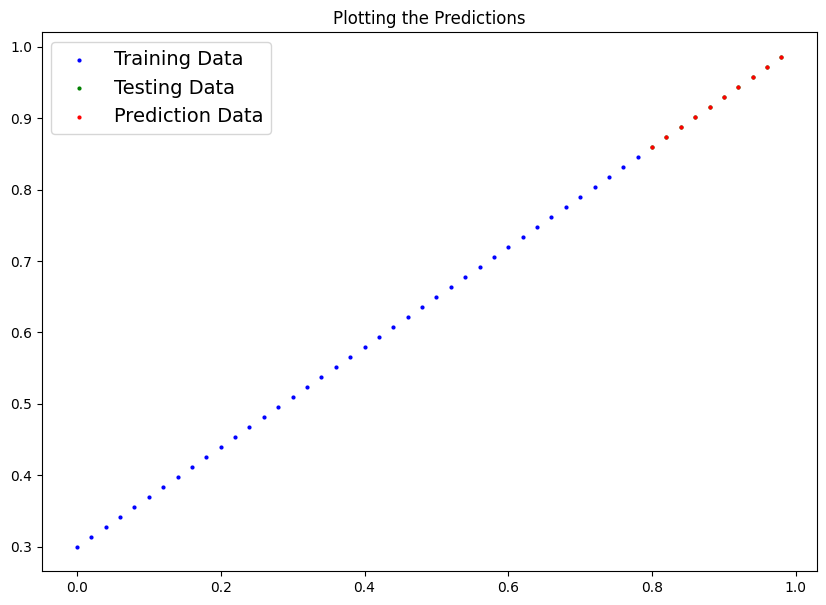

In [ ]:
# Check out the model's predictions visually
plot_predictions(predictions=y_preds.cpu(), plot_title="Plotting the Predictions") # <- Must move the preds back to the CPU so that numpy can be used with matplotlib

### 6.5 Saving and Loading trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH2 = MODEL_PATH / MODEL_NAME # <- We can use this syntax to create the file in the directory bc we are using pathlib

# 3. Save model state_dict
print(f"Saving the model to: {MODEL_SAVE_PATH2}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH2)

Saving the model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Load a PyTorch Model

# Create new instance of the linear regression model
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH2))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device, loaded_model_1.state_dict()

(device(type='cuda', index=0),
 OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]))

In [ ]:
# Evaluate the loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')